# Pandas Case Study - Time Series Analysis

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## A Quick Revision

Up to this point, we have studied and worked with the following Pandas DateTime utilities:

* `Timestamp()`
* `DatetimeIndex()`
* `date_range()`
* `to_datetime()`

These form the **core building blocks** for handling date and time data in Pandas.

We will now introduce one more crucial component — the **Timedelta object** — and then combine all of these concepts in a **Time Series Analysis case study**.

---

## Timedelta Object

Just as *delta* represents change or difference in values, a **Timedelta object** represents a **duration**, i.e., the difference between two dates or times.

It answers questions like:

* How many days between two timestamps?
* What is the duration between two events?
* How far forward or backward should we shift time?

---

### Creating a Timedelta Using Timestamp Objects

```python
t1 = pd.Timestamp("6th Jan 2023 8:20:14")
t2 = pd.Timestamp("26th Jan 2023 10:00:00")

t2 - t1
```

**Output:**

```
Timedelta('20 days 01:39:46')
```

**Explanation:**

* Subtracting two `Timestamp` objects automatically returns a `Timedelta`
* The result represents the **exact duration** between the two moments

---

### Stand-alone Timedelta Object Creation

A `Timedelta` does not always need to be derived from timestamps.
It can also be created directly.

```python
pd.Timedelta(days=2, hours=10, minutes=35)
```

**Output:**

```
Timedelta('2 days 10:35:00')
```

**Use cases:**

* Shifting timestamps
* Defining rolling windows
* Offsetting time-series data

---

## Arithmetic Operations Using Timedelta

### Adding Timedelta to a Timestamp

```python
pd.Timestamp("6th Jan 2023") + pd.Timedelta(days=2, hours=10, minutes=35)
```

**Output:**

```
Timestamp('2023-01-08 10:35:00')
```

**Explanation:**

* Adds a fixed duration to a single timestamp
* Common in forecasting and deadline calculations

---

### Applying Timedelta to a DatetimeIndex

```python
pd.date_range(start="2023-1-6", end="2023-1-31", freq='D') - 
pd.Timedelta(days=2, hours=10, minutes=35)
```

**Output:**

```
DatetimeIndex(['2023-01-03 13:25:00', '2023-01-04 13:25:00',
               '2023-01-05 13:25:00', '2023-01-06 13:25:00',
               '2023-01-07 13:25:00', '2023-01-08 13:25:00',
               ...
               '2023-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')
```

---

### What Does This Code Do?

* Generates a **daily DatetimeIndex** from January 6 to January 31, 2023
* Subtracts a fixed `Timedelta` from **every timestamp**
* The operation is **vectorised**, meaning:

  * No loops
  * High performance
  * Applied uniformly to all dates

This kind of operation is extremely common in:

* Lag feature creation
* Time shifting
* Time-series alignment
* Window-based analysis

---

## Key Takeaway Before Time Series Analysis

* `Timestamp` → represents a single moment in time
* `DatetimeIndex` → represents a sequence of timestamps
* `Timedelta` → represents a duration or difference
* All operations are **vectorised and optimized**

In [28]:
# demonstration using Timestamp Objects
t1 = pd.Timestamp("6th Jan 2023 8:20:14")
t2 = pd.Timestamp("26th Jan 2023 10:00:00")
t2-t1

Timedelta('20 days 01:39:46')

In [29]:
# standalone Timedelta Object creation
pd.Timedelta(days = 2, hours = 10, minutes = 35)

Timedelta('2 days 10:35:00')

In [30]:
# arithmetic
pd.Timestamp("6th Jan 2023") + pd.Timedelta(days = 2, hours = 10, minutes = 35)

Timestamp('2023-01-08 10:35:00')

In [31]:
pd.date_range(start="2023-1-6", end="2023-1-31", freq='D') - pd.Timedelta(days=2, hours=10, minutes=35)

DatetimeIndex(['2023-01-03 13:25:00', '2023-01-04 13:25:00',
               '2023-01-05 13:25:00', '2023-01-06 13:25:00',
               '2023-01-07 13:25:00', '2023-01-08 13:25:00',
               '2023-01-09 13:25:00', '2023-01-10 13:25:00',
               '2023-01-11 13:25:00', '2023-01-12 13:25:00',
               '2023-01-13 13:25:00', '2023-01-14 13:25:00',
               '2023-01-15 13:25:00', '2023-01-16 13:25:00',
               '2023-01-17 13:25:00', '2023-01-18 13:25:00',
               '2023-01-19 13:25:00', '2023-01-20 13:25:00',
               '2023-01-21 13:25:00', '2023-01-22 13:25:00',
               '2023-01-23 13:25:00', '2023-01-24 13:25:00',
               '2023-01-25 13:25:00', '2023-01-26 13:25:00',
               '2023-01-27 13:25:00', '2023-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

### A Real Life Example
Ahead is a simple Real-Life Examplary demonstration of using Time Object, particularly **Timedelta Object**.

In [32]:
# real life example
del_df = pd.read_csv("datasets/deliveries.csv")
del_df

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98
...,...,...
496,6/24/91,2/2/96
497,9/9/91,3/30/98
498,11/16/90,4/27/98
499,6/3/93,6/13/93


In [33]:
del_df['order_date'] = pd.to_datetime(del_df['order_date'])
del_df['delivery_date'] = pd.to_datetime(del_df['delivery_date'])
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


/tmp/ipykernel_12398/1351654443.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  del_df['order_date'] = pd.to_datetime(del_df['order_date'])
/tmp/ipykernel_12398/1351654443.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  del_df['delivery_date'] = pd.to_datetime(del_df['delivery_date'])


In [34]:
del_df['delivery time'] = del_df['delivery_date'] - del_df['order_date']
del_df.head()

,order_date,delivery_date,delivery time
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


In [35]:
del_df['delivery time'].mean()

Timedelta('1217 days 22:53:53.532934128')

## Time Series

> This session is not focused on the mathematical theory of Time Series, but on **how to work with Time Series data using Pandas**.

A **Time Series** is a dataset that records observations of a variable **over time**, typically at regular intervals.
It allows us to study how values evolve and how different factors influence a variable from one time period to another.

Time series data is fundamental in understanding trends, seasonality, patterns, and temporal dependencies.

---

### Common Examples of Time Series Data

* **Financial Data**
  Stock prices, market indices, cryptocurrency prices

* **Natural Data**
  Rainfall measurements, temperature readings, climate data

* **Event-Based Data**
  COVID-19 case counts, website traffic, user activity logs

* **Medical Data**
  Heart rate monitoring, blood pressure readings, patient vitals

---

### Types of Operations Performed on Time Series

* **Time Series Analysis**
  Understanding patterns, trends, seasonality, and anomalies in historical data

* **Time Series Forecasting**
  Predicting future values based on past observations

---

## Key Focus of This Session

* Handling time-indexed data using Pandas
* Cleaning and structuring time series datasets
* Applying vectorised DateTime operations
* Preparing data for analysis and forecasting

In [36]:
# google stock price time-series dataset
google = pd.read_csv("datasets/GOOGL.csv")
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [37]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


In [38]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [39]:
google['Date'] = pd.to_datetime(google['Date'])

Its a good tactic to set the 'Date' column of the dataframe as the index in a Time Series Dataset.

In [40]:
google.set_index('Date', inplace=True)
google.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343


## Fetching dates and Partial Indexing
While dates can be fetched using the `.loc[]` functionality, one notable point is that **partial indexing** can be performed if the **Dates** column is used as an index. This is demonstrated in the following code cells.

In [41]:
# fetch a specific date
google.loc['2021-12-31'].to_frame()

,2021-12-31
Open,2921.000000
High,2933.969971
Low,2897.040039
Close,2897.040039
Adj Close,2897.040039
Volume,906800.000000


In [42]:
# partial indexing -> select a particular month
google.loc['2022-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2901.100098,2917.020020,2874.260010,2899.830078,2899.830078,1432300
2022-01-04,2907.919922,2929.699951,2874.330078,2887.989990,2887.989990,1420000
2022-01-05,2888.399902,2889.989990,2753.760010,2755.500000,2755.500000,2730900
2022-01-06,2739.969971,2798.800049,2731.169922,2754.949951,2754.949951,1867400
2022-01-07,2762.909912,2768.969971,2715.330078,2740.340088,2740.340088,1488000
2022-01-10,2701.560059,2776.389893,2663.290039,2773.389893,2773.389893,2220400
2022-01-11,2760.139893,2804.320068,2733.850098,2794.719971,2794.719971,1436500
2022-01-12,2823.000000,2852.159912,2813.889893,2828.610107,2828.610107,1305400
2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800


## Creating Month-name, Day-name, and Quarter

In [43]:
# create year month-name and day-name
google['Month Name'] = google.index.month_name()
google['Day Name'] = google.index.day_name()
google['Quarter'] = google.index.quarter
google.head()

,Open,High,Low,Close,Adj Close,Volume,Month Name,Day Name,Quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3


## Slicing

In [44]:
google.loc['2021-12-15' : '2022-01-31' : 2]

,Open,High,Low,Close,Adj Close,Volume,Month Name,Day Name,Quarter
Date,,,,,,,,,
2021-12-15,2868.179932,2934.419922,2833.560059,2928.820068,2928.820068,1818500,December,Wednesday,4
2021-12-17,2850.000000,2876.689941,2826.000000,2834.500000,2834.500000,2520800,December,Friday,4
2021-12-21,2841.070068,2877.379883,2810.050049,2869.449951,2869.449951,1437800,December,Tuesday,4
2021-12-23,2930.000000,2964.870117,2929.040039,2938.330078,2938.330078,1319200,December,Thursday,4
2021-12-28,2964.719971,2965.979980,2921.090088,2933.739990,2933.739990,910000,December,Tuesday,4
2021-12-30,2933.879883,2946.000000,2919.889893,2924.010010,2924.010010,784400,December,Thursday,4
2022-01-03,2901.100098,2917.020020,2874.260010,2899.830078,2899.830078,1432300,January,Monday,1
2022-01-05,2888.399902,2889.989990,2753.760010,2755.500000,2755.500000,2730900,January,Wednesday,1
2022-01-07,2762.909912,2768.969971,2715.330078,2740.340088,2740.340088,1488000,January,Friday,1


## **Challenge**: Fetch info for a particular date every year
Intuitively, one may try to do this using the following strategy, which is also pretty obvious for reasons.

In [45]:
pd.date_range(start='2005-01-06', end='2022-01-06', freq = pd.Timedelta(days=365))

DatetimeIndex(['2005-01-06', '2006-01-06', '2007-01-06', '2008-01-06',
               '2009-01-05', '2010-01-05', '2011-01-05', '2012-01-05',
               '2013-01-04', '2014-01-04', '2015-01-04', '2016-01-04',
               '2017-01-03', '2018-01-03', '2019-01-03', '2020-01-03',
               '2021-01-02', '2022-01-02'],
              dtype='datetime64[ns]', freq='365D')

**ISSUE**: This method works fine, until it reaches a **Leap Year**. That's when there is one more day during an Year, and as a result, the output shortens by one day for the respective year.

Therefore, the following method is suggested for this purpose.

In [46]:
pd.date_range(start='2005-01-06', end='2022-01-06', freq = pd.DateOffset(years=1))

DatetimeIndex(['2005-01-06', '2006-01-06', '2007-01-06', '2008-01-06',
               '2009-01-06', '2010-01-06', '2011-01-06', '2012-01-06',
               '2013-01-06', '2014-01-06', '2015-01-06', '2016-01-06',
               '2017-01-06', '2018-01-06', '2019-01-06', '2020-01-06',
               '2021-01-06', '2022-01-06'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [47]:
# applying the mask into the google dataframe
google[google.index.isin(pd.date_range(start='2005-01-06', end='2022-01-06', freq = pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,Month Name,Day Name,Quarter
Date,,,,,,,,,
2005-01-06,97.637634,98.048050,93.953957,94.369370,94.369370,20753426,January,Thursday,1
2006-01-06,228.663666,235.485489,226.846848,233.063065,233.063065,35478286,January,Friday,1
2009-01-06,166.656662,170.570572,163.358353,167.197205,167.197205,12837550,January,Tuesday,1
2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949443,January,Wednesday,1
2011-01-06,305.645660,309.524536,305.330322,307.057068,307.057068,4111484,January,Thursday,1
2012-01-06,329.904907,330.330322,325.220215,325.335327,325.335327,5380414,January,Friday,1
2014-01-06,557.062073,559.989990,553.773804,559.219238,559.219238,3535061,January,Monday,1
2015-01-06,520.500000,521.210022,505.549988,506.640015,506.640015,2722800,January,Tuesday,1
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300,January,Wednesday,1


## Visualization

<Axes: xlabel='Date'>

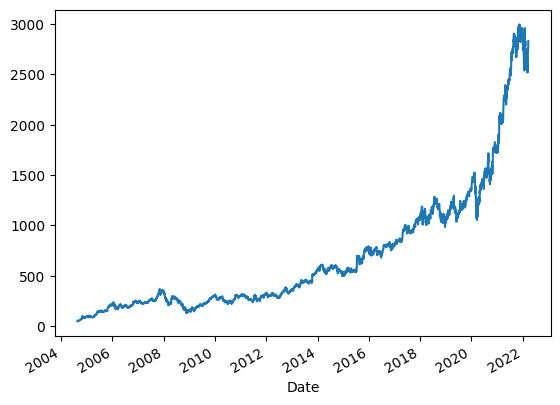

In [48]:
# single column visualization
google['Close'].plot()

In [49]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Month Name,Day Name,Quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3


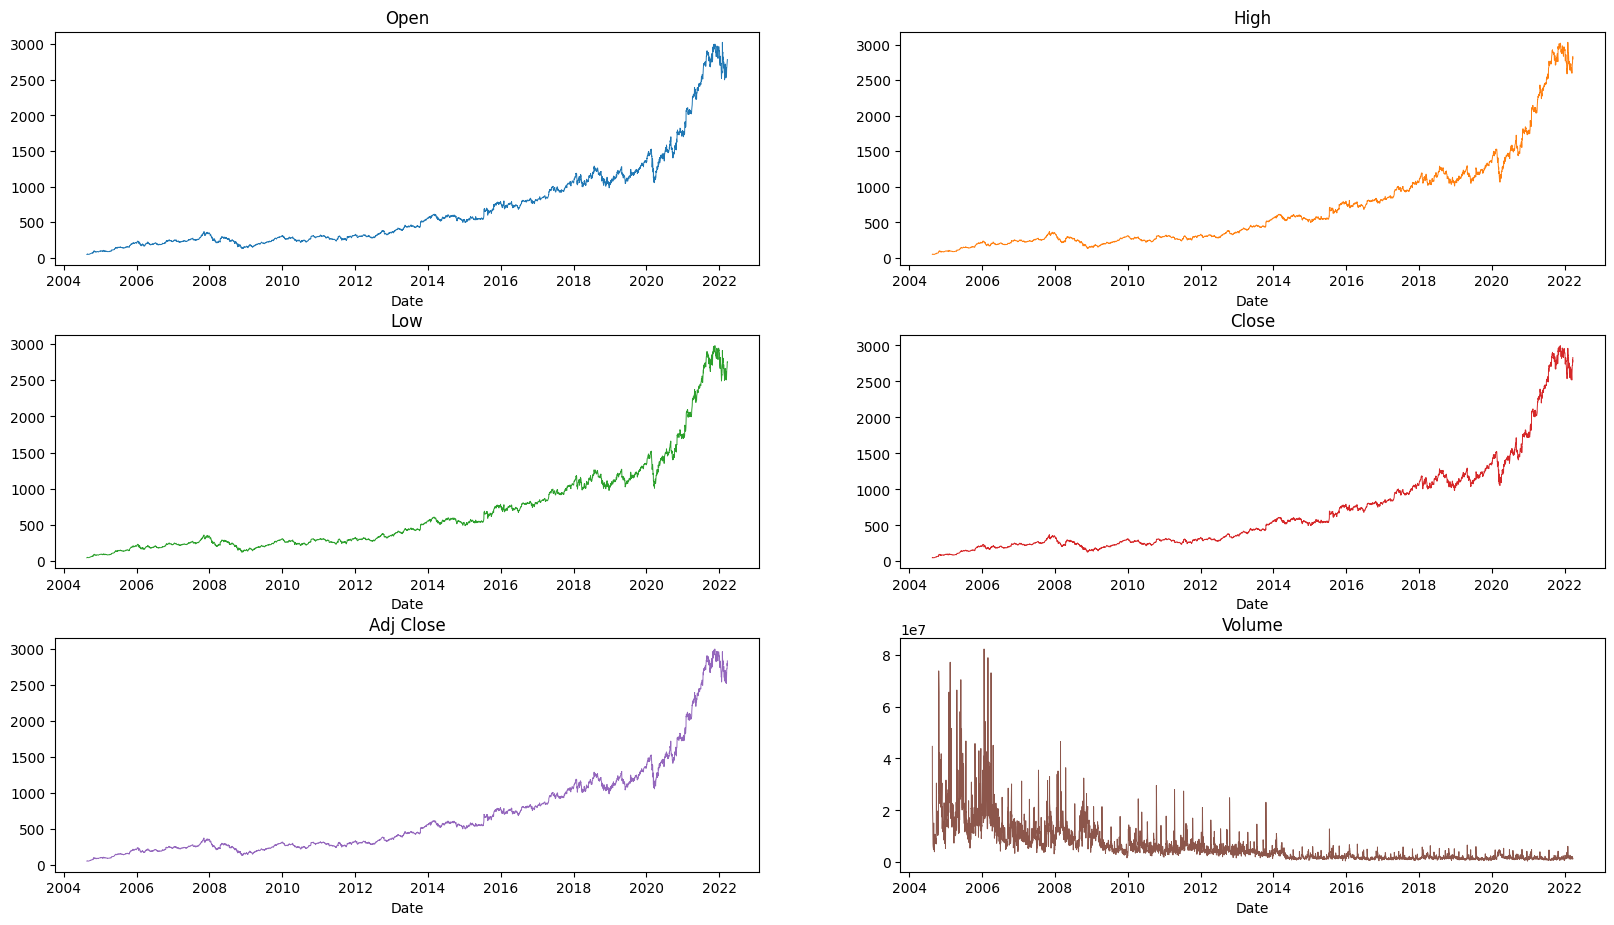

In [ ]:
subset_google = google[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# plot
ax = subset_google.plot(
    subplots=True,
    layout=(3, 2),
    sharex=False,
    sharey=False,
    linewidth=0.7,
    fontsize=10,
    legend=False,
    figsize=(20, 10),
    title=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
)

plt.subplots_adjust(
  top=0.92,
  bottom=0.08,
  hspace=0.3
)

<Axes: xlabel='Date'>

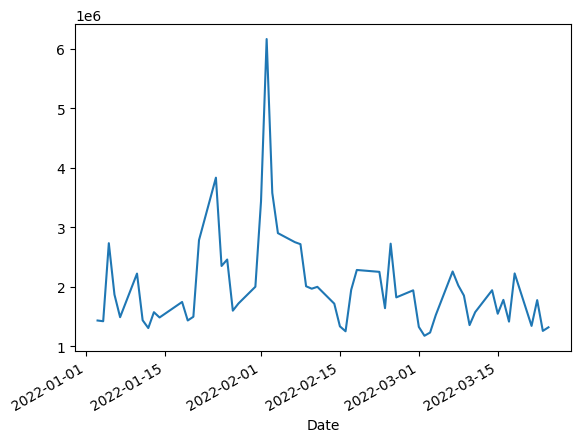

In [51]:
# plot for a particular year/month/week
google.loc['2022']['Volume'].plot()

<Axes: xlabel='Date'>

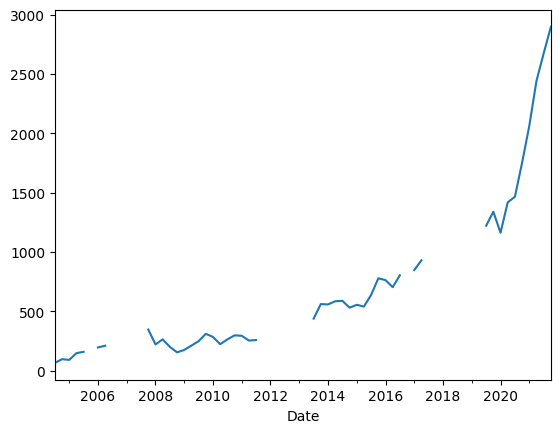

In [70]:
# quaterly trend
google['Close'].asfreq('QE').plot()

In the above plot, there are gaps during certain years. The gaps are supposedly due to the days being **Non-Business Days**.

<Axes: xlabel='Month Name'>

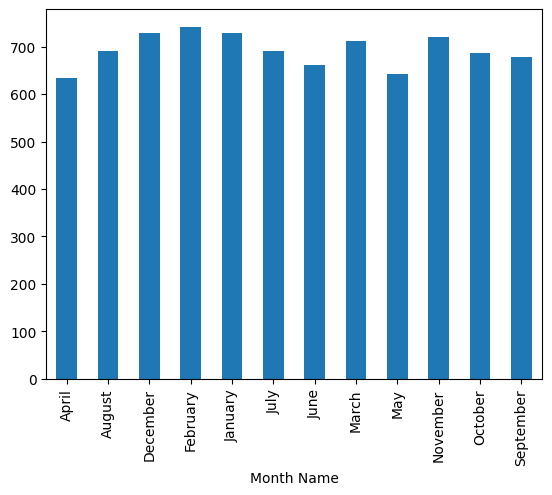

In [74]:
# monthly trend
google.groupby('Month Name')['Open'].mean().plot(kind='bar')

> Note that the bars do not represent the **trend** in the immediately preceding cell, rather they show the **average monthly aggregated composition density**.

## Frequency (`freq`) in Time Series

When working with time-series data, **frequency** refers to **how often observations occur over time**.

Let us first inspect the index of the dataset:

```python
google.index
```

**Output (truncated):**

```
DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               ...
               '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4431, freq=None)
```

---

### Why Is `freq=None`?

Although the data is time-indexed, Pandas cannot automatically infer a fixed frequency because:

* Stock market data does **not include weekends**
* Some dates are missing (Saturday, Sunday, holidays)
* The spacing between dates is **not uniform**

Hence, `freq=None`.

---

## Setting Frequency Using `asfreq()`

To explicitly define a frequency, Pandas provides the `asfreq()` method.

```python
google.asfreq('D')
```

### What Does `asfreq('D')` Do?

* Converts the index to **daily frequency**
* Inserts **missing calendar days** (Saturday and Sunday)
* Newly created dates have **NaN values** for all columns

This is why rows like the following appear:

```text
2004-08-21  NaN  NaN  NaN  ...
2004-08-22  NaN  NaN  NaN  ...
```

This behavior is **expected and intentional**.

---

## Choosing the Right Frequency

For stock market data, **business days** are more appropriate than calendar days.

```python
google.asfreq('B')
```

### Why `'B'` (Business Day) Is Better Here

* Excludes weekends automatically
* Matches the natural trading schedule
* Avoids unnecessary NaN rows
* More suitable for financial time series

---

## Common Frequency Aliases in Pandas

| Alias | Meaning          |
| ----- | ---------------- |
| `D`   | Daily            |
| `B`   | Business day     |
| `W`   | Weekly           |
| `M`   | Monthly          |
| `Q`   | Quarterly        |
| `Y`   | Yearly           |
| `H`   | Hourly           |
| `6H`  | Every 6 hours    |
| `15T` | Every 15 minutes |

These aliases allow flexible time-based restructuring of data.

---

## Handling NaN Values Using `method` Parameter

When changing frequency, new timestamps may be introduced, leading to missing values.
Pandas provides the `method` parameter to handle this.

### Forward Fill (`ffill`)

```python
google.asfreq('D', method='ffill')
```

**Explanation:**

* Fills missing values using the **last known observation**
* Assumes the value remains unchanged until the next update
* Commonly used in:

  * Financial data
  * Inventory levels
  * Sensor readings

---

### Backward Fill (`bfill`)

```python
google.asfreq('D', method='bfill')
```

**Explanation:**

* Fills missing values using the **next available observation**
* Less common in finance
* Useful when future value logically applies backward

---

## Important Conceptual Distinction

* `asfreq()` **does not perform aggregation**
* It only **reindexes the time series**
* If aggregation is required (mean, sum, OHLC), `resample()` should be used instead

This distinction is critical in Time Series Analysis.

---

## Key Takeaways

* `freq` defines the regularity of time-series data
* `freq=None` means Pandas cannot infer a consistent pattern
* `asfreq()` explicitly sets frequency
* Choosing the correct frequency depends on the domain
* `method='ffill'` and `method='bfill'` help manage missing values
* Proper frequency handling is essential before analysis or forecasting

In [52]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4431, freq=None)

In [53]:
# asfreq
google.asfreq('B')

,Open,High,Low,Close,Adj Close,Volume,Month Name,Day Name,Quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0,August,Friday,3.0
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0,August,Monday,3.0
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0,August,Tuesday,3.0
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602.0,August,Wednesday,3.0
...,...,...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100.0,March,Friday,1.0
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600.0,March,Monday,1.0
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800.0,March,Tuesday,1.0


## Resampling

**Resampling** refers to changing the **frequency** of observations in a time series.
It allows us to convert data from one time granularity to another in a controlled and meaningful way.

---

### Types of Resampling

Resampling can be broadly classified into two types:

* **Upsampling**
  Increasing the frequency of observations
  Example: minutes → seconds

* **Downsampling**
  Decreasing the frequency of observations
  Example: days → weeks or months

In practice, **downsampling is far more common** than upsampling, especially in exploratory data analysis and visualization.

---

## Downsampling

Downsampling is typically used to:

* Reduce noise
* Smooth trends
* Make long-term patterns more visible
* Improve interpretability of plots

---

### Example: Daily Stock Data

```python
google['Open'].plot()
```

**Observation:**

* The plot is precise but very noisy
* Daily fluctuations create excessive spikes
* Long-term trends are difficult to observe

---

### Weekly Downsampling

```python
google['Open'].resample('W').mean().plot()
```

**Explanation:**

* Converts daily data into **weekly frequency**
* Uses `mean()` as the aggregation function
* Smoothens short-term fluctuations
* Reveals medium-term trends

---

### Monthly Downsampling

```python
google['Open'].resample('ME').mean().plot()
```

**Explanation:**

* Converts data into **monthly frequency**
* Further smoothens the curve
* Makes long-term behavior more visible
* No data is lost; values are **summarized**, not removed

The aggregation function (`mean` here) represents each larger time window.

---

### Important Note on Downsampling

* Downsampling **summarizes** data into larger intervals
* It does **not skip or discard** data
* The choice of aggregation function matters:

  * `mean()` → average trend
  * `sum()` → total volume
  * `max()` / `min()` → extremes
  * `ohlc()` → financial candlestick data

---

### Broader Applications of Downsampling

Downsampling is also used in:

* Data compression
* Signal processing
* Machine learning and deep learning
* Convolutional Neural Networks (CNNs)

However, those applications are outside the scope of this session.

---

## Upsampling

Upsampling increases the frequency of the time series.
This introduces **new timestamps**, which initially have missing values.

---

### Example: Upsampling with Interpolation

```python
google['Close'].resample('12H').interpolate(method='spline', order=2).plot()
```

**Explanation:**

* Converts data to a **12-hour frequency**
* Uses spline interpolation to estimate missing values
* Produces a smoother and more continuous curve

---

### Important Notes on Upsampling

* Upsampling does **not create new information**
* Interpolation estimates values mathematically
* Should be used carefully to avoid misleading conclusions
* Less common than downsampling in real-world analysis

---

## Key Takeaways

* Resampling changes the frequency of time-series data
* Downsampling is commonly used for smoothing and trend analysis
* Upsampling requires interpolation to fill missing values
* Aggregation functions define how data is summarized
* Proper resampling improves clarity and interpretability

<Axes: xlabel='Date'>

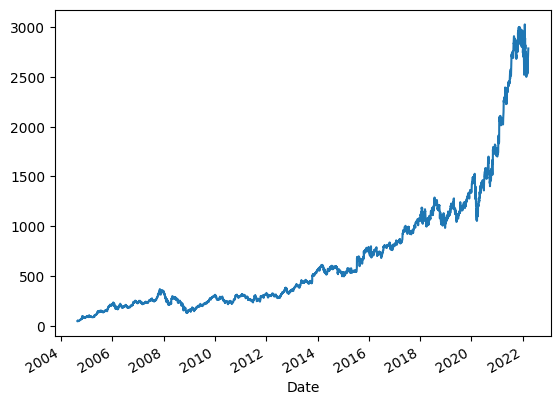

In [ ]:
# noisy trend line graph
google['Open'].plot()

<Axes: xlabel='Date'>

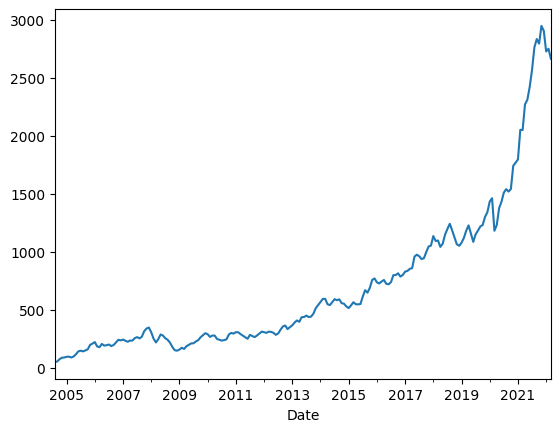

In [ ]:
# downsampling to smoothen out the graph
google['Open'].resample('ME').mean().plot()

<Axes: xlabel='Date'>

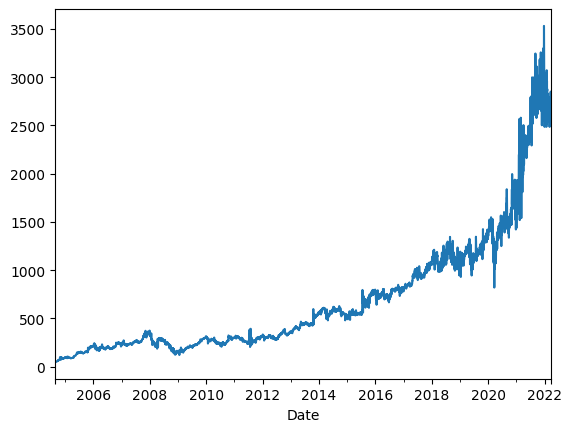

In [83]:
# Upsampling
google['Close'].resample('12h').interpolate(method='spline', order=2).plot()

## Rolling Window (Smoothing)

Time series data in its raw form is often **highly volatile**, especially when observations are recorded at fine-grained frequencies (daily, hourly, etc.).
To reduce short-term fluctuations and highlight long-term trends, we use **rolling (or moving) averages**.

---

## What Is a Rolling / Moving Average?

A **rolling average** computes the average of a fixed-size window of consecutive data points as the window “moves” forward over time.

Instead of looking at a single data point in isolation, each value is replaced by the **average of itself and its neighboring values** within the window.

---

### Intuition with a Simple Example

Assume we have daily values:

```
Day:      D1   D2   D3   D4   D5
Values:   10   12   14   13   15
```

Using a **rolling window of size = 3**:

```
Window 1: [10, 12, 14] → mean = 12
Window 2: [12, 14, 13] → mean = 13
Window 3: [14, 13, 15] → mean = 14
```

Graphically (conceptual view):

```
           ┌───────┐
D1  D2  D3 │ mean  │
    ┌───────┐
D2  D3  D4 │ mean  │
        ┌───────┐
D3  D4  D5 │ mean  │
```

Each window **slides forward by one step**, recomputing the mean.

---

### Equal Weightage in Rolling Average

In a **simple rolling (moving) average**:

* All points inside the window have **equal weight**
* No preference is given to recent or older values

Mathematically, for window size `n`:

[
\text{Rolling Mean} = \frac{x_1 + x_2 + \dots + x_n}{n}
]

---

## Rolling Mean in Pandas

```python
google['Open'].rolling(3).mean()
```

**Output (truncated):**

```
Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      52.012012
2004-08-24      53.887221
2004-08-25      54.546212
...
```

### Why Are the First Values `NaN`?

* A rolling window of size `3` needs **three data points**
* Until enough data points are available, Pandas returns `NaN`

---

## Visual Comparison Using a Plot

```python
google['Open'].plot()
google['Open'].rolling(120).mean().plot()
plt.legend(['without rolling', 'with rolling'])
```

**Observation:**

* Original series → noisy, volatile
* Rolling mean → smoother, clearer trend
* Larger window size → more smoothing

This makes rolling averages extremely useful for **trend detection**.

---

## Exponential Moving Average (EMA / EWM)

So far, we have discussed **simple rolling averages**, where all points have equal importance.

However, in many real-world scenarios:

* Recent observations are more important than older ones

This leads to **Exponential Moving Average (EMA)**, also known in Pandas as **Exponentially Weighted Mean (EWM)**.

---

### Key Difference from Rolling Average

* **Rolling Average** → equal weight to all points
* **Exponential Moving Average** → higher weight to recent points
* Weight decreases exponentially as we move backward in time

This makes EMA:

* More responsive to recent changes
* Better suited for financial and real-time data

---

### Exponential Moving Average in Pandas

```python
google['Open'].plot()
google['Open'].ewm(120).mean().plot()
plt.legend(['without rolling', 'with rolling'])
```

**Conceptual Insight:**

* The curve reacts faster to sudden changes
* Older values still contribute, but with diminishing influence
* Weightage increases progressively for newer data points

---

## When to Use What?

| Method       | Use Case                                          |
| ------------ | ------------------------------------------------- |
| Rolling Mean | Noise reduction, long-term trend visualization    |
| EMA / EWM    | Financial data, momentum tracking, responsiveness |
| Small Window | Short-term smoothing                              |
| Large Window | Long-term trend extraction                        |

---

## Key Takeaways

* Rolling averages smooth time series data
* Simple rolling mean gives **equal weight** to all values
* Larger windows produce smoother curves
* Exponential moving averages emphasize recent data
* Rolling and EWM are foundational tools in time series analysis

In [94]:
google['Open'].rolling(3).mean()

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      52.012012
2004-08-24      53.887221
2004-08-25      54.546212
                 ...     
2022-03-18    2648.709961
2022-03-21    2684.913330
2022-03-22    2704.596680
2022-03-23    2739.783366
2022-03-24    2760.026693
Name: Open, Length: 4431, dtype: float64

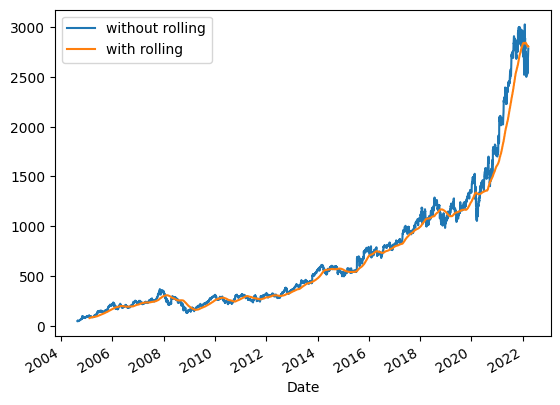

In [92]:
# showing the difference using a plot
google['Open'].plot()
google['Open'].rolling(120).mean().plot()
plt.legend(['without rolling', 'with rolling'])

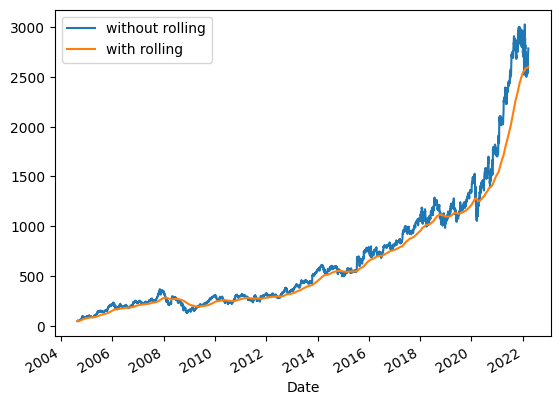

In [95]:
google['Open'].plot()
google['Open'].ewm(120).mean().plot()
plt.legend(['without rolling', 'with rolling'])

## Shifting

The `shift()` function in Pandas is used to **move (shift) data up or down in time** by a specified number of periods **without changing the index**.

In simple terms:

* The **index remains the same**
* The **values move forward or backward**

---

### Basic Example

```python
google['Close'].shift(2)
```

**Output (truncated):**

```
Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      50.220219
2004-08-24      54.209209
2004-08-25      54.754753
...
```

**Explanation:**

* `shift(2)` moves data **down by 2 rows**
* The first two values become `NaN`
* The value from `t−2` now aligns with time `t`

---

## Why Is `shift()` Important?

`shift()` is essential whenever we want to:

* Compare **current vs past values**
* Create **lag features**
* Compute **returns or differences**
* Detect **changes over time**
* Prepare data for **machine learning models**

---

## Common Use Cases of `shift()`

---

### 1. Creating Lag Features

Lag features are widely used in:

* Time series forecasting
* Machine learning models
* Econometric analysis

```python
google['Close_lag1'] = google['Close'].shift(1)
google['Close_lag2'] = google['Close'].shift(2)
```

**Interpretation:**

* `Close_lag1` → yesterday’s closing price
* `Close_lag2` → closing price from two days ago

---

### 2. Calculating Day-to-Day Change

```python
google['Daily_Change'] = google['Close'] - google['Close'].shift(1)
```

**Explanation:**

* Measures absolute change between consecutive days
* Positive → price increased
* Negative → price decreased

---

### 3. Calculating Daily Returns (Percentage Change)

```python
google['Daily_Return'] = (
    google['Close'] - google['Close'].shift(1)
) / google['Close'].shift(1)
```

This is a foundational concept in financial time series analysis.

---

### 4. Comparing Current Value with Rolling Statistics

```python
google['Rolling_Mean_20'] = google['Close'].rolling(20).mean()
google['Above_Rolling_Mean'] = (
    google['Close'] > google['Rolling_Mean_20'].shift(1)
)
```

**Use case:**

* Avoids **data leakage**
* Ensures only past information is used for comparison

---

### 5. Detecting Trend Direction

```python
google['Trend'] = (
    google['Close'] > google['Close'].shift(1)
)
```

**Interpretation:**

* `True` → upward movement
* `False` → downward movement

---

### 6. Multi-Period Comparisons

```python
google['Weekly_Change'] = google['Close'] - google['Close'].shift(5)
```

**Explanation:**

* Compares today’s price with price from 5 business days ago
* Useful for short-term trend analysis

---

## Important Characteristics of `shift()`

* Does **not modify the index**
* Introduces `NaN` values
* Works with:

  * Series
  * DataFrames
* Can shift forward (`shift(-1)`) or backward (`shift(1)`)

---

## `shift()` vs `diff()`

| Method         | Purpose                               |
| -------------- | ------------------------------------- |
| `shift()`      | Moves data in time                    |
| `diff()`       | Calculates difference between periods |
| `pct_change()` | Calculates percentage change          |

Internally, many of these operations rely on `shift()`.

---

## Key Takeaways

* `shift()` aligns past or future values with the current timestamp
* Critical for time-based comparisons
* Widely used in finance, forecasting, and ML feature engineering
* Helps prevent data leakage in modeling

In [97]:
google['Close'].shift(2)

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      50.220219
2004-08-24      54.209209
2004-08-25      54.754753
                 ...     
2022-03-18    2665.610107
2022-03-21    2676.780029
2022-03-22    2722.510010
2022-03-23    2722.030029
2022-03-24    2797.360107
Name: Close, Length: 4431, dtype: float64